In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# 1層のNN
class NNGP:
    def __init__(self, X: np.ndarray, transf:any, n_sample:int = 200):
        self.X = X
        self.transf = transf
        self.n_sample = n_sample
    
    def NN(self, H):
        rng = np.random.default_rng()
        # print(H, *self.X.shape)
        w = rng.normal(size=(H, self.X.shape[1]))*5/np.sqrt(H)    # (H x D)
        b = rng.normal(size=(1, self.X.shape[0]))*0.1           # (1 x N)
        v = rng.normal(size=(H, self.X.shape[0]))*5             # (H x N)
        h = self.transf(b + w @ self.X.T) # f((1 x N) + ((H x D) @ (N x D).T) -> (H x N)
        y = np.diag(v.T @ h)                                    # (H x N).T @ (H x N) -> (N x N)

        # w = rng.normal(size=(H, *self.X.shape))*5/np.sqrt(H)    # (H x N x D)
        # b = rng.normal(size=(1, self.X.shape[0]))*0.1           # (1 x N)
        # v = rng.normal(size=(H, self.X.shape[0]))*5             # (H x N)
        # h = self.transf(b + np.einsum('hnd,nd->hn', w, self.X)) # f((1 x N) + (H x N)) -> (H x N)
        # y = np.diag(v.T @ h)                                    # (H x N).T @ (H x N) -> (N x N)

        return y
    
    def simulate(self, H):
        res = []
        for i in range(self.n_sample):
            res.append(self.NN(H))
        return np.array(res)
    
    def plot_simulation(self, H):
        res = self.simulate(H)
        fig, ax = plt.subplots()
        ax.scatter(res[:,0], res[:,1])

# 伝達関数
class Transfer:
    @staticmethod
    def sigmoid(x):
        return 1/(1 + np.exp(-x))
    
    @staticmethod
    def step(x):
        return np.where(x >= 0, 1, -1)


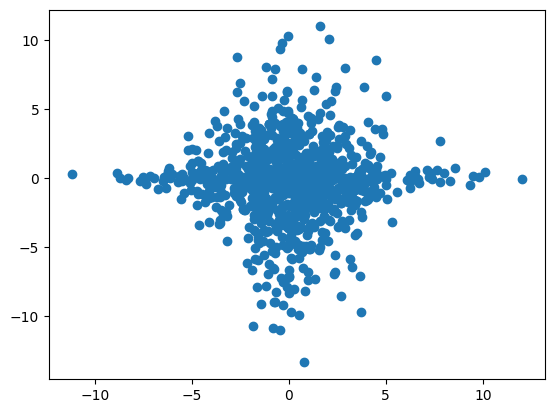

In [103]:
X = np.array([[-0.2],[0.4]])
nngp_sig = NNGP(X=X, transf=Transfer.sigmoid, n_sample=1000)
nngp_sig.plot_simulation(1)